<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/2_SerieyTransformadaFourier/RepresentacionLegendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de la ortogonalidad de las bases de Legendre

El grupo de polinomios de legendre $P_n(x)$, con $n \in \mathbb{Z}^+$ forma un conjunto completo de funciones mutuamente ortogonales en el intervalo $(-1 < t < 1)$ y se define como:

$$
P_n(t) = \frac{1}{2^nn!}\frac{d^n}{dt^n}\left\{(t^2-1)^n\right\},
$$

Por ende:

$$
\begin{align}
P_0(t) =& 1\\
P_1(t) =& t\\
P_2(t) =& \left(\frac{3}{2}t^2-\frac{1}{2}\right)\\
P_3(t) =& \left(\frac{5}{2}t^3-\frac{3}{2}\right)\\
\vdots =& \vdots
\end{align}
$$

Se puede verificar la ortogonalidad de estos polinomios.

In [ ]:
from sympy import *
init_printing()
t = symbols('t', real=True)

for i in range(0, 9):
    print("P{}(t) =".format(i))
    pprint(legendre(i, t))
    print(end=2*'\n')

P0(t) =
1


P1(t) =
t


P2(t) =
   2    
3⋅t    1
──── - ─
 2     2


P3(t) =
   3      
5⋅t    3⋅t
──── - ───
 2      2 


P4(t) =
    4       2    
35⋅t    15⋅t    3
───── - ───── + ─
  8       4     8


P5(t) =
    5       3       
63⋅t    35⋅t    15⋅t
───── - ───── + ────
  8       4      8  


P6(t) =
     6        4        2     
231⋅t    315⋅t    105⋅t    5 
────── - ────── + ────── - ──
  16       16       16     16


P7(t) =
     7        5        3       
429⋅t    693⋅t    315⋅t    35⋅t
────── - ────── + ────── - ────
  16       16       16      16 


P8(t) =
      8         6         4        2      
6435⋅t    3003⋅t    3465⋅t    315⋅t     35
─────── - ─────── + ─────── - ────── + ───
  128        32        64       32     128




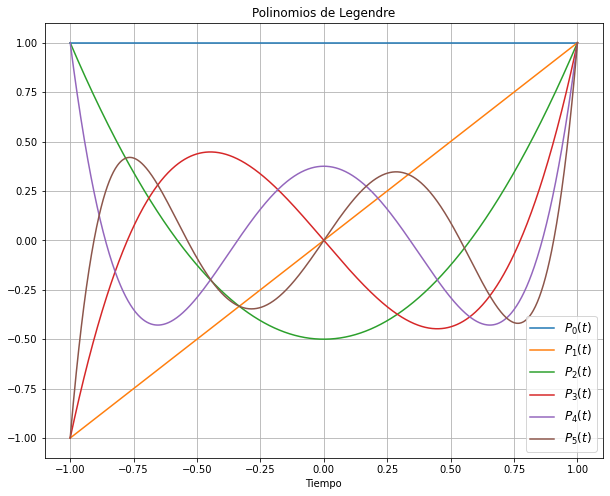

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

tn = np.linspace(-1, 1, 1000)
plt.figure(figsize=(10, 8))
plt.plot(tn, np.ones(tn.shape), label="$P_0(t)$")
for i in range(1, 6):
    plt.plot(tn, lambdify(t, legendre(i, t), "numpy")(tn), label="$P_{}(t)$".format(i))
plt.legend(loc="best", fontsize=12)
plt.xlabel("Tiempo")
plt.title("Polinomios de Legendre")
plt.grid()

**Ejemplo 1**

In [ ]:
def Leg_Serie(x, N):
    C = []
    xl = 0
    for degree in range(N):
        C.append((integrate(x*legendre(degree, t), (t, -1, 1)))/(integrate(legendre(degree, t) ** 2, (t, -1, 1))))
        xl += C[degree] * legendre(degree, t)
    return C, xl

## Reconstrucción de una señal utilizando Legendre

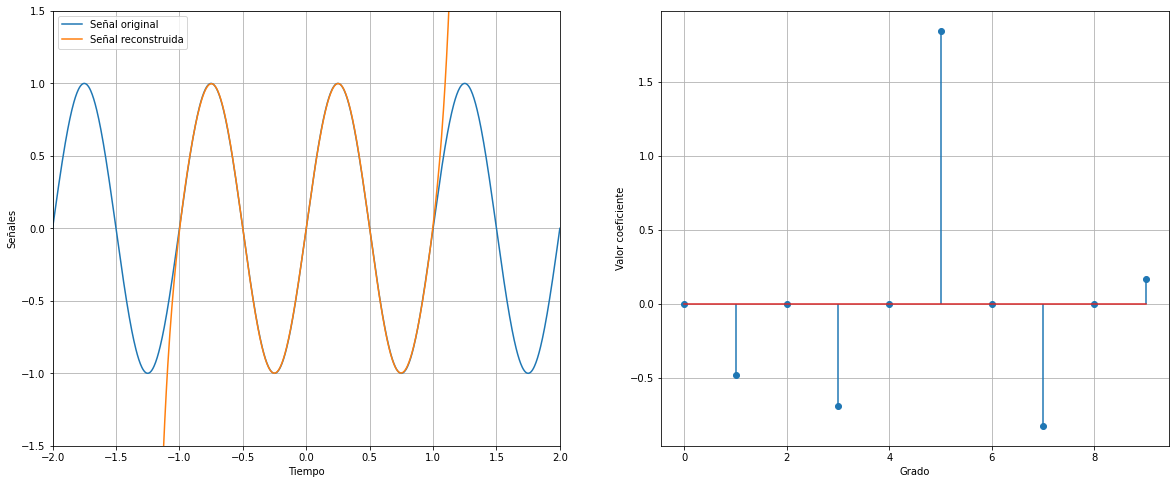

In [ ]:
tn = np.linspace(-2, 2, 1000)
x = sin(2*pi*t)

C, xl = Leg_Serie(x, 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.plot(tn, lambdify(t,  x, "numpy")(tn), label="Señal original")
ax1.plot(tn, lambdify(t,  xl, "numpy")(tn), label= "Señal reconstruida")
ax1.grid()
ax1.legend(loc="best")
ax1.margins(x=0)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Señales")

ax2.stem(np.arange(len(C)), [i.evalf() for i in C], use_line_collection=True)
ax2.grid()
ax2.set_xlabel("Grado")
ax2.set_ylabel("Valor coeficiente")

fig.show()

**Ejemplo 2**

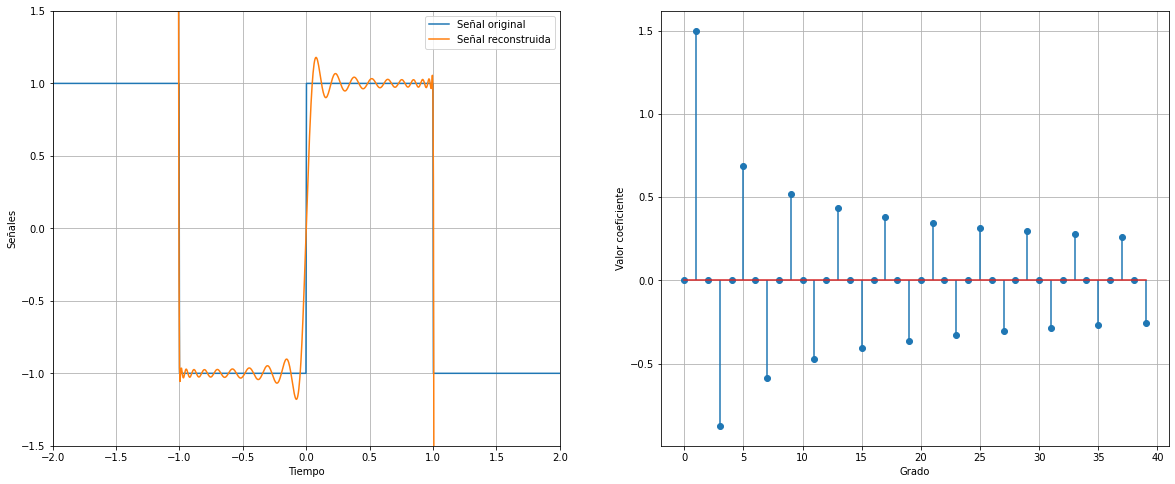

In [ ]:
x = Piecewise((1, ((t<1) & (t >=0)) | ((t<-1) & (t >=-2))), (-1, ((t>=1) & (t < 2)) | ((t>=-1) & (t <0))))

C, xl = Leg_Serie(x, 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.plot(tn, lambdify(t,  x, "numpy")(tn), label="Señal original")
ax1.plot(tn, lambdify(t,  xl, "numpy")(tn), label= "Señal reconstruida")
ax1.grid()
ax1.legend(loc="best")
ax1.margins(x=0)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Señales")

ax2.stem(np.arange(len(C)), [i.evalf() for i in C], use_line_collection=True)
ax2.grid()
ax2.set_xlabel("Grado")
ax2.set_ylabel("Valor coeficiente")

fig.show()

# La reconstrucción se puede extender fuera del intervalo [-1,1]

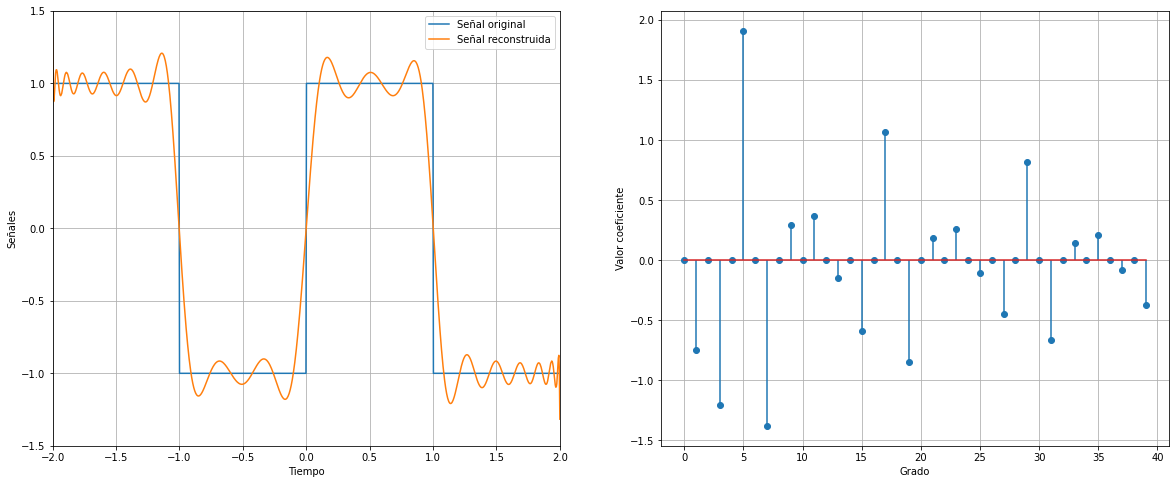

In [ ]:
# Dilatación de los polinomios de Legendre
C = []
xl = 0
for degree in range(40):
    C.append((integrate(x*legendre(degree, t/2), (t, -2, 2)))/(integrate(legendre(degree, t/2) ** 2, (t, -2, 2))))
    xl += C[degree] * legendre(degree, t/2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.plot(tn, lambdify(t,  x, "numpy")(tn), label="Señal original")
ax1.plot(tn, lambdify(t,  xl, "numpy")(tn), label= "Señal reconstruida")
ax1.grid()
ax1.legend(loc="best")
ax1.margins(x=0)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Señales")

ax2.stem(np.arange(len(C)), [i.evalf() for i in C], use_line_collection=True)
ax2.grid()
ax2.set_xlabel("Grado")
ax2.set_ylabel("Valor coeficiente")

fig.show()